# Wrangle and Analyze Data

## Introduction

The dataset that is used for this exercise is an extended archive of tweets from the [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs) twitter account. 

### Project Details

The dataset consists of three files:

1. An enhanced tweet archive provided by Udacity and downloaded from its portal.

2. Tweet Image Predictions which come in another fle provided by Udacity, but which is downloaded via server call using Python's requests library.

3. Retweet and favorite counts for each of the tweets in the enhanced tweet archive which I will gather via the Twitter API using the Tweepy library. This data is then saved to a csv file locally which will be submitted to Udacity in fulfillment of the project requirements.

Once these files are gathered, I will assess each of them for both quality and for tidiness.  After any quality issues are fixed and the dataframes saved in a tidy format, we will have a file or files that will enable analyis.  We will produce at least one visualization which will enable us to summarize our findings.

## Load Python Libraries for Gathering, Assesment and Cleaning

Load packages and libraries required for subsequent blocks.

In [2]:
# import packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from timeit import default_timer as timer

## Gather Data

Gather data need for analyzing We Rate Dogs (@dog_rates) twitter feed. There are three files comprising the broader data set.

### File on-hand: Twitter Archive

This file was presented on and downloaded from the Udacity website. So it is simply read into the dataframe using the Pandas 'read_csv' function.

In [3]:
# read dog_rates twitter archive
df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# printing a sample of the dataframe allows for visual inspection.
df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1922,674255168825880576,NaN,NaN,2015-12-08 15:52:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Bobbay. He's a marshmallow wizard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674255168...,10,10,Bobbay,None,None,None,None
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,None,None,None,None
1684,681679526984871937,NaN,NaN,2015-12-29 03:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can you spot Toby the guilty pupper? 7/10 woul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681679526...,7,10,None,None,None,pupper,None


In [5]:
# using the pandas info() function shows all the variables, their data-types and gives us 
# a count of the entries and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Download File from Server: Tweet Image Predictions

For the tweet image predictions file, we download the file from a Udacity server using the 'requests' library. This file is then written (saved) to the project directory.

In [6]:
# download tweet image predictions from server - save into workspace
image_prediction = {'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'}
# 'for' loop downloads all files at URL list in ebert_review_urls variable
for url in image_prediction:
    response = requests.get(url)
    with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

We can verify that the download occurred by viewing the project directory to confirm there is an 'image_predictions.csv' file in it

In [7]:
os.listdir()

['stuff.txt',
 'details_t2_p3.txt',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'README.md',
 'project_intro_t2p3',
 '.gitignore',
 'tweepy_practice.py',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 '.git',
 'rubric_t2p3.txt',
 'tweet_json.txt']

We then open the file using the 'read_csv' function with the tab-separator indicated.

In [5]:
df2 = pd.read_csv('image-predictions.tsv',sep='\t')

Next, we perform a brief visual inspection and examine the fields using the info() function, same as with the tweet archive file.

In [10]:
df2.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
1312,754482103782404096,https://pbs.twimg.com/ext_tw_video_thumb/75448...,1,tub,0.596796,False,bathtub,0.381098,False,shower_curtain,0.017629,False
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Create File Dynamically Using Tweepy to Query Twitter API: tweet_json.txt File

The third file needed for this project containing information such as 'retweet' and 'favorite' counts is created dynamically by querying the Twitter api.

First steps took place elsewhere. At apps.twitter.com, I created a (dummy) app which enabled me to create authorization keys as required by Twitter.

Second step is to enter code as indicated in the [Tweepy documentation](http://tweepy.readthedocs.io/en/v3.6.0/getting_started.html#introduction) authenticating access to the API.  These are omitted from the project submission per security best practices and as specified in the project rubric.

In [82]:
# Tweepy auth stuff
# place keys here - delete manually for now

In [110]:
# Tweepy auth stuff continued: note the parameters included in the API call
# setting parser to tweepy.JSONParser ensures that it returns good JSON
# rate_limit parameters enable the function to work through the Twitter rate limit
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True,\
                 wait_on_rate_limit_notify=True)

The next step is for Tweepy to access twitter data for the 2356 tweets in the tweet_archive file and to download that data as a json file. First we take the tweet_id variable in the first dataframe (created from the twitter archive csv) and turn it into a list.  The length of that list is returned as a test (2356 is the correct number).

In [87]:
# put all of the tweetids from the twitter_archive csv/dataframe into a list
tweetids = df['tweet_id'].tolist()
# tweetids
len(tweetids)

2356

Then we are going to loop through the list of tweet_ids to access the corresponding records via the Twitter api. We are using a try-except block to save the twitter status for the ids that have records and, separately, to keep a file of the ids which have been deleted. Thanks to the "wait_on_rate_limit" parameter in the api call, the function will not time out while waiting for data from the 'rate limited' API.

In [89]:
# List of dictionaries to build and convert to a DataFrame later
tweet_list = []
tweet_errors = []
start = timer()
for tweet in tweetids:
    try:
        full_status = api.get_status(tweet, tweet_mode='extended')
        tweet_list.append(full_status)
        end = timer()
    except Exception as e:
        end = timer()
        print('No status found for tweetid ' + str(tweet))
        print('Time elapsed to error ' + str(end - start))
        tweet_errors.append(tweet)
print('Total runtime for function ' + str((end - start)/60) + ' minutes.')
print(len(tweet_list))
print (len(tweet_errors))

No status found for tweetid 888202515573088257
Time elapsed to error 4.967670181998983
No status found for tweetid 873697596434513921
Time elapsed to error 21.60596933600027
No status found for tweetid 869988702071779329
Time elapsed to error 26.490966256998945
No status found for tweetid 866816280283807744
Time elapsed to error 29.46525864698924
No status found for tweetid 861769973181624320
Time elapsed to error 34.22458414500579
No status found for tweetid 845459076796616705
Time elapsed to error 53.73645277399919
No status found for tweetid 842892208864923648
Time elapsed to error 56.511891781992745
No status found for tweetid 837012587749474308
Time elapsed to error 65.38332627300406
No status found for tweetid 827228250799742977
Time elapsed to error 83.12681407199125
No status found for tweetid 802247111496568832
Time elapsed to error 122.45716445101425
No status found for tweetid 775096608509886464
Time elapsed to error 169.60564937099116


Rate limit reached. Sleeping for: 468
Rate limit reached. Sleeping for: 708


Time total runtime for function 2.826760822849853 minutes.
2345
11


There were 2345 tweets that had meta-data returned and 11 which had been deleted subsequent to the creation of the twitter_archive csv.  Next let's take a look at one line from the tweet_list to see what the data looks like.

In [90]:
tweet_list[:1]

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540},
      'medium': {'h': 528, 'resize': 'fit', 'w': 540},
      'small': {'h': 528, 'resize': 'fit', 'w': 540},
      'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
     'type': 'photo',
     'url': 'https://t.co/MgUWQ76dJU'}],
   'symbols': [],
   'urls': [],
   'user_mentions': []},
  'extended_entities': {'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'htt

This appears to be well-formed JSON: we'll know for sure when we save it and try to reopen that file.  Next step is to store the output as a text file 'tweet_json.txt' using the json.dump function.

In [91]:
# Store tweet info in JSON format

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_list, outfile)

Our test to make sure it worked is to see if there is a 'tweet_json.txt' file in our working directory.

In [12]:
os.listdir()

['stuff.txt',
 'details_t2_p3.txt',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'README.md',
 'project_intro_t2p3',
 '.gitignore',
 'tweepy_practice.py',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 '.git',
 'rubric_t2p3.txt',
 'tweet_json.txt']

And it is there! Our next step is to read this text file into a dataframe using Pandas read_json function

In [9]:
df_json = pd.read_json(open('tweet_json.txt'))

In [10]:
df_json.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38693,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8559,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


This is a massive file with a ton of data, so I only printed out the first item to make sure that the dataframe is properly formed. The next (and *final*) step in gathering our data is to select only the variables needed for this project ('id','retweet_count','favorite_count') and put them into a new dataframe.

In [11]:
df3 = df_json[['id','retweet_count','favorite_count']]

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 73.3 KB


In [13]:
df3.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8559,38693
1,892177421306343426,6294,33167
2,891815181378084864,4176,24967


We can see that the dataframe for these items is complete and tidy.  Now on to further assessment of the data we have gathered in these three files.

## Assess Data

For each of the three dataframes created from the three files, we will perform the following assessment steps:

1. Review df.info() results in order to:
  - Count valid and null values in each variable
  - Review and check variable names
  - Validate data types
2. Print a sample of 10 values from the dataframe and perform a visual inspection for quality and validity.
3. Run a duplicates function to check for duplicated rows (another quality/validity check).
4. Run value counts function to check quality and validity of entries.

**Please note that the issues and potential-issues will be tracked below in the Notes section. And we will only correct a smaller subset of these items per the project instructions.**

### WeRateDogs Tweet Archive from File On-Hand

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Variable `timestamp` is string, probably should be a datetime.

In [18]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,10,10,None,None,None,None,None
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Crazy unseen footage from Jurassic Park. 10/10...,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
2107,670465786746662913,NaN,NaN,2015-11-28 04:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Silly dog here. Wearing bunny ears. Nice long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670465786...,7,10,None,None,None,None,None
152,862722525377298433,NaN,NaN,2017-05-11 17:34:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He passed the h*ck out. It's bar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862722525...,11,10,Dave,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1548,689275259254616065,NaN,NaN,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,None,None,None,None
1094,736736130620620800,NaN,NaN,2016-05-29 01:49:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736736130...,13,10,Chadrick,None,None,None,None
2028,671866342182637568,NaN,NaN,2015-12-02 01:39:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671866342...,10,10,Dylan,None,None,None,None
1791,677335745548390400,NaN,NaN,2015-12-17 03:53:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Downright inspiring 12/10 https://t.co/vSLtYBWHcQ,NaN,NaN,NaN,https://vine.co/v/hbLbH77Ar67,12,10,None,None,None,None,None
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,7,10,a,None,None,None,None


Upon visual inspection, one issue that stands out is the use of 'None' for missing values in the `name` and stages variables. This should be changed to NaN

In [20]:
# checking for duplicate rows
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
# checking for duplicated tweet id
df[df['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [32]:
# run value_counts on 'name' variable
vc = df['name'].value_counts()
print(vc[vc > 3].to_string())

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
an            7
Bailey        7
Buddy         7
Toby          7
Leo           6
Scout         6
Dave          6
Oscar         6
Milo          6
Rusty         6
Bella         6
Koda          6
Jax           6
Stanley       6
Jack          6
George        5
Sammy         5
Bentley       5
Louis         5
Larry         5
Gus           5
Finn          5
Chester       5
Alfie         5
very          5
Phil          5
Sunny         5
Oakley        5
Jerry         4
Derek         4
Jeffrey       4
Reggie        4
Archie        4
Maggie        4
Sampson       4
Brody         4
Beau          4
Duke          4
Chip          4
quite         4
Luna          4
Clarence      4
Moose         4
Maddie        4
Riley         4
Walter        4
Cassie        4
Scooter       4
Hank    

A number of these are clearly incorrect - 'None','a','the', 'an', etc. - noted below in corrections file.

In [18]:
df.rating_numerator.value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

The larger values here '165', '666', '1776' are clearly incorrect - noted below.

In [19]:
df.rating_denominator.value_counts().sort_values()

70        1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
0         1
40        1
16        1
2         1
7         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

The rating's denominator is always supposed to be 10 (not sure why this field was included as it seems unnecessary). The other values need to be cleaned.

In [33]:
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [34]:
df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [35]:
df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [36]:
df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

We can't pinpoint any quality issues here, though only small percentage of the items have a rating like this. As discussed elsewhere, these four columns represent a tidiness issue and should be melted into one.

### Image Prediction Table (df2) Downloaded from Server

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The datatypes look correct here.

In [6]:
df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
269,670815497391357952,https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg,1,American_Staffordshire_terrier,0.919714,True,Staffordshire_bullterrier,0.073430,True,bull_mastiff,0.000906,True
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True
1159,733828123016450049,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,beagle,0.472324,True,Walker_hound,0.121779,True,Saint_Bernard,0.114640,True
1076,717421804990701568,https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg,2,miniature_pinscher,0.286479,True,Italian_greyhound,0.084134,True,beagle,0.064697,True
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
449,674737130913071104,https://pbs.twimg.com/media/CV0l10AU8AAfg-a.jpg,1,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
1406,770069151037685760,https://pbs.twimg.com/media/Cq_Vy9KWcAIUIuv.jpg,1,Boston_bull,0.414965,True,American_Staffordshire_terrier,0.286985,True,Staffordshire_bullterrier,0.114970,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1231,745789745784041472,https://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,1,Pekinese,0.984267,True,Shih-Tzu,0.008942,True,cocker_spaniel,0.001928,True


In [7]:
df2[df2['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


So no duplicates in that file.

### Retweet and Favorite Counts Gathered from Twitter API

In [137]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 73.3 KB


Data types here are correct - all are integers. Also worth noting: 2345 items = 2356 in the tweet archive - 11 tweets that were deleted subsequently (noted above after we queried the archive.

In [14]:
df3.sample(10)

,id,retweet_count,favorite_count
804,771004394259247104,246,0
2093,670668383499735048,5321,11113
27,886680336477933568,4489,22367
1507,690932576555528194,1116,3513
1916,674051556661161984,509,1507
1770,677698403548192770,347,1293
1154,722974582966214656,1711,4375
594,798585098161549313,6431,0
48,882762694511734784,4945,28261
190,855138241867124737,49,0


In [16]:
df3[df3['id'].duplicated()]

,id,retweet_count,favorite_count


No duplicate ids. Worth noting that the `id` field here is called `tweet_id` in the other two dataframes: this might be worth changing to enhance readability and clarity.

## Assessment Summary

### Quality Issues

#### Tweet Archive Table (df) from "File On-Hand"

1. Timestamp variable is a string: should be converted to a datetime format.
1. Retweets need to be identified and removed.
1. Replies need to be identified and removed
1. `name` variable includes 55 "the", 8 "a", 7 "an", 5 "very", 4 "just" "quite" and "one."  Not to mention 745 with "None" as name. All these need to be changed to NaN.
1. `rating_denominator` variable includes several values other than 10. Need to address.
1. Use of 'None' for missing values in stages variables. Replace with NaN.
1. 11 Tweets that have been subsequently deleted and so are missing retweet and favorite numbers can be removed
1. `tweet_id` is more usefully set as a string (instead of integer). Note this variable is called `id` in df2 (retweet & favorite counts)


  - **Note** `rating_numerator` variable includes numerous large values that are likely incorrect: however, visual inspection reveals that some rating are intentional, others are decimal values which were incorrectly transcribed and others are not valid ratings. As a result, I have decided to make this out-of-scope for this project.

#### Image Prediction Table (df2) Downloaded from Server

- No data quality issues identified
- **Note** For possible further investigations, identify delta between df2_clean with 2057 records and df1_clean with 2356 records (see above)

#### Retweet and Favorite Counts Gathered from Twitter API (df3)

- **Note** Figure out why certain tweets have thousands of retweets and 0 favorites: is there a problem with the quality of the data or something else (question to self: when were favorites introduced on twitter??)
- **Note** `id` field in df3 is called `tweet_id` in the other two dataframes: marginally worth changing.

### Tidiness Issues

1. Since all three of these tables concern the same set of observations (observation = tweetid), the tidiest version of this data will be a single table. This will enable us to eliminate duplicate tweet ids and some other columns (like the photo url in df2). Accordingly we will join the three tables and will remove duplicate columns.
1. Dog stage columns need to be melted into one single "Dog Stage" column with the values either "doggo", "floofer", "pupper" or "poppo" or "none"
- Note to self: it's possible that in order to do this properly we will need to convert the "None" string into NaN missing value. That would be a quality issue in df table above.

## Clean Data

### Preliminaries to Cleaning

Create clean copies and csvs of all three dataframes.

In [20]:
# create clean copies of all three dataframes
df_clean = df.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

In [24]:
# create csvs from the dataframes
df_clean.to_csv('twitter-archive-enhanced-clean.csv')
df2_clean.to_csv('image-predictions-clean.csv')
df3_clean.to_csv('tweet-json-clean.csv')

In [23]:
# check that clean files have been created
os.listdir()

['stuff.txt',
 'details_t2_p3.txt',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'twitter-archive-enhanced-clean.csv',
 'README.md',
 'project_intro_t2p3',
 '.gitignore',
 'tweepy_practice.py',
 'tweet-json-clean.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 '.git',
 'rubric_t2p3.txt',
 'tweet_json.txt',
 'image-predictions-clean.csv']

In [253]:
# when restarting Jupyter notebook, start cleaning process from these files
df_clean = pd.read_csv('twitter-archive-enhanced-clean.csv')
df2_clean = pd.read_csv('image-predictions-clean.csv')
df3_clean = pd.read_csv('tweet-json-clean.csv')

### Quality Issue #1

#### Define
Convert `timestamp` variable to datetime format

In [254]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
Unnamed: 0                    2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         235

#### Code

In [255]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [256]:
df_clean.head(2)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [257]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
Unnamed: 0                    2356 non-null int64
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                    

`timestamp` variable changed

### Quality Issue #2 & #3

#### Define
Since the project calls for orginal tweets with images, we will first identify then drop all items that are either retweets or replies.

In [258]:
# returning all items that are retweets - these need to be eliminated from final dataframe
df_clean[df_clean['retweeted_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [259]:
# returning all items that are replies - these need to be eliminated from final dataframe
df_clean[df_clean['in_reply_to_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [260]:
 # Recreate dataset df_clean excluding retweets
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
 # Recreate dataset df_clean excluding replys
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]

#### Test

Check first for retweets -

In [261]:
df_clean[df_clean['retweeted_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Note:** df has been trimmed from 2356 items to 2097

No check for replies -

In [262]:
df_clean[df_clean['in_reply_to_status_id'].notnull()]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [263]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
Unnamed: 0                    2097 non-null int64
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         209

### Quality Issue #4

#### Define
Change erroneous items in `name` variable (including 745 with "None", 55 "the", 8 "a", 7 "an", 5 "very", 4 "just" "quite" and "one") to NaN.

#### Code

In [264]:
df_clean['name'].replace('None', np.nan, inplace=True)
df_clean['name'].replace('the', np.nan, inplace=True) 
df_clean['name'].replace('a', np.nan, inplace=True) 
df_clean['name'].replace('an', np.nan, inplace=True) 
df_clean['name'].replace('my', np.nan, inplace=True)
df_clean['name'].replace('very', np.nan, inplace=True)
df_clean['name'].replace('just', np.nan, inplace=True)
df_clean['name'].replace('quite', np.nan, inplace=True)
df_clean['name'].replace('one', np.nan, inplace=True)

#### Test

Let's run the same value_counts function on the `name` variable that we did above and then print a sample for visual inspection.

In [265]:
vc = df_clean['name'].value_counts()
print(vc[vc > 3].to_string())

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Lola         8
Winston      8
Sadie        8
Toby         7
Daisy        7
Bo           6
Stanley      6
Koda         6
Bella        6
Oscar        6
Jax          6
Bailey       6
Leo          5
Rusty        5
Chester      5
Scout        5
Bentley      5
Louis        5
Dave         5
Buddy        5
Milo         5
Archie       4
Finn         4
Dexter       4
Larry        4
Jack         4
Alfie        4
Derek        4
Chip         4
Clarence     4
Bear         4
Oakley       4
Winnie       4
George       4
Jeffrey      4
Gus          4
Maggie       4
Sophie       4
Jerry        4
Duke         4
Sammy        4
Reggie       4
Clark        4
Scooter      4
Cassie       4
Phil         4
Gary         4
Brody        4
Boomer       4


In [266]:
df_clean.sample(10)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
133,133,866720684873056260,NaN,NaN,2017-05-22 18:21:28,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,NaN,NaN,NaN,https://twitter.com/nbcnews/status/86645871888...,13,10,NaN,None,None,None,None
1152,1152,725786712245440512,NaN,NaN,2016-04-28 20:40:11,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lillie. She's a Rutabagan Floofem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725786712...,11,10,Lillie,None,None,pupper,None
229,229,848212111729840128,NaN,NaN,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
1858,1858,675501075957489664,NaN,NaN,2015-12-12 02:23:01,"<a href=""http://twitter.com/download/iphone"" r...","I shall call him squishy and he shall be mine,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675501075...,13,10,NaN,None,None,None,None
2128,2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,NaN,None,None,None,None
463,463,817423860136083457,NaN,NaN,2017-01-06 17:33:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None
1400,1400,699446877801091073,NaN,NaN,2016-02-16 04:15:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's undercover in all these p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699446877...,12,10,Archie,None,None,None,None
1196,1196,717047459982213120,NaN,NaN,2016-04-04 17:53:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio (pronounced Baxter). He's a Ben...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717047459...,12,10,Flávio,None,None,None,None
1044,1044,743609206067040256,NaN,NaN,2016-06-17 01:00:24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stark. He just had his first ice cream co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743609206...,10,10,Stark,None,None,None,None
882,882,760290219849637889,NaN,NaN,2016-08-02 01:44:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Rocco. He's doing his best. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760290219...,13,10,Rocco,None,None,None,None


Looks like the fix was successful.

### Quality Issue #5

#### Define

`rating_denominator` variable includes several values other than 10. Need to make all the denominators '10'.

#### Code

In [267]:
df_clean.loc[df_clean['rating_denominator'] != 10, 'rating_denominator'] = 10

#### Test

In [268]:
df_clean['rating_denominator'].value_counts()

10    2097
Name: rating_denominator, dtype: int64

Done!

### Quality Issue #6

#### Define

Use of 'None' for missing values in stages variables. Replace with NaN.

#### Code

In [269]:
df_clean['doggo'].replace('None', np.nan, inplace=True) 
df_clean['floofer'].replace('None', np.nan, inplace=True) 
df_clean['pupper'].replace('None', np.nan, inplace=True) 
df_clean['puppo'].replace('None', np.nan, inplace=True)

#### Test

In [270]:
df_clean['doggo'].value_counts()

doggo    83
Name: doggo, dtype: int64

In [271]:
df_clean['floofer'].value_counts()

floofer    10
Name: floofer, dtype: int64

In [272]:
df_clean['pupper'].value_counts()

pupper    230
Name: pupper, dtype: int64

In [273]:
df_clean['puppo'].value_counts()

puppo    24
Name: puppo, dtype: int64

The 'None' strings have all been removed - fix is successful.

### Quality Issue #7

#### Define

11 Tweets that have been subsequently deleted and so are missing retweet and favorite numbers can be removed

#### Code

In [274]:
# Saving missing tweets into list. This was done programatically above, but I didn't save 
# it into a csv and won't spend 40 minutes running that script again
api_errors = [888202515573088257, 873697596434513921,869988702071779329,866816280283807744,\
 861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308,\
 827228250799742977,802247111496568832,775096608509886464]

# remove the api_errors tweets
df_clean = df_clean.loc[~df_clean['tweet_id'].isin(api_errors),:]

#### Test

In [275]:
df_clean.loc[df_clean['tweet_id'].isin(api_errors),:]

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [276]:
df_clean['tweet_id'].isin(api_errors).value_counts()

False    2097
Name: tweet_id, dtype: int64

Items removed.

### Quality Issue #8

#### Define

`tweet_id` datatype should be changed to string.  While we are at it, we will change `id` variable in df3 to `tweet_id`

#### Code

In [277]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
Unnamed: 0                    2097 non-null int64
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1410 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-n

In [278]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
Unnamed: 0    2075 non-null int64
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(3), object(4)
memory usage: 168.3+ KB


In [279]:
df3_clean = df3

In [280]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.3+ KB


In [281]:
# change the datatype to string
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)
df3_clean.id = df3_clean.id.astype(str)

/Users/jasonhorowitz/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [282]:
# rename `id` field in df3_clean to `tweet_id`
df3_clean = df3_clean.rename(columns={'id': 'tweet_id'})

#### Test

In [283]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
Unnamed: 0                    2097 non-null int64
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1410 non-null object
doggo                         83 non-null object
floofer                       10 non-null object
pupper                        230 non-null object
puppo                         24 non-

In [284]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
Unnamed: 0    2075 non-null int64
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


In [285]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.3+ KB


`tweet_id` fields have all been changed to string datatype

### Tidiness Issue #1

#### Define

Dog stage columns need to be melted into one single "Dog Stage" column with the values either "doggo", "floofer", "pupper" or "poppo" or "NaN."  Data type should equal "category."

#### Code

In [286]:
df_clean.sample(1)
# df_clean.drop('stage', 1)

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
90,90,874680097055178752,NaN,NaN,2017-06-13 17:29:20,"<a href=""http://twitter.com/download/iphone"" r...",Meet Cash. He hath acquired a stick. A very go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874680097...,12,10,Cash,NaN,NaN,NaN,NaN


Temporarily remove NaN values from stage columns to enable join.

In [287]:
#replace the null value with empty character to prepare data for join

df_clean['doggo'].replace(np.nan,'', inplace=True) 
df_clean['floofer'].replace(np.nan,'', inplace=True) 
df_clean['pupper'].replace(np.nan,'', inplace=True) 
df_clean['puppo'].replace(np.nan, '', inplace=True)

Join stage columns using lambda join - joined data appears in `stage` column

In [288]:
# join data using python lambda join
df_clean['stage'] = df_clean[['doggo', 'floofer','pupper','puppo']]\
.apply(lambda x: ''.join(set (x.astype(str))), axis=1)

In [289]:
df_clean['stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
doggopupper        9
floofer            9
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

Looks like that worked. We now have 1761 blank items which need to be converted to NaN. Also there are 11 rows where dogs were classified in multiple stages. We'll add `-` as a separator to make those items more readable. Finally, we'll convert stage into a categorical `category` variable.

In [290]:
# replace blank with NaN
df_clean['stage'].replace('', np.nan, inplace=True)

In [291]:
# separate items with multiple stages
df_clean['stage'].replace('doggopupper', 'doggo-pupper', inplace=True) 
df_clean['stage'].replace('doggopuppo', 'doggo-puppo', inplace=True) 
df_clean['stage'].replace('doggofloofer', 'doggo-floofer', inplace=True)

In [292]:
# change `stage` variable to category
df_clean.stage = df_clean.stage.astype('category')

#### Test

In [293]:
df_clean['stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo-pupper       9
doggo-puppo        1
doggo-floofer      1
Name: stage, dtype: int64

In [294]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 19 columns):
Unnamed: 0                    2097 non-null int64
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          1410 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         20

### Tidiness Issues #2 and #3. 

#### Define

- Since all three of these tables concern the same set of observations (observation = tweetid), the tidiest version of this data will be a single table. 
- This will enable us to eliminate duplicate tweet ids and some other variables. 
- Accordingly we will join the three tables and will remove duplicate columns.

#### Code

The trimmed, combined dataframe will contain the following data:

- tweet_id 
- timestamp
- source
- text
- rating numerator 
- rating_denominator 
- stage 
- retweet_count 
- favorite_count 
- jpg_url
- img_num 
- p1
- p1_conf 
- p1_dog 
- p2
- p2_conf 
- p2_dog 
- p3 
- p3_conf 
- p3_dog

First we will drop the following from df_clean (the trimmed WeRateDogs archive):

- Unnamed: 0
- retweeted_status_id 
- retweeted_status_user_id 
- retweeted_status_timestamp
- in_reply_to_status_id
- in_reply_to_user_id
- expanded_urls
- doggo
- floofer
- pupper
- puppo

In [297]:
df_clean = df_clean.drop(['Unnamed: 0', 'retweeted_status_id', 'retweeted_status_user_id',\
                          'retweeted_status_timestamp', 'in_reply_to_status_id',\
                          'in_reply_to_user_id','expanded_urls', 'doggo', 'floofer',\
                          'pupper', 'puppo'],axis=1)

#### Test

In [330]:
df_clean.sample(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
1994,672604026190569472,2015-12-04 02:31:10,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,11,10,NaN,NaN


In [331]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1410 non-null object
stage                 336 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 133.5+ KB


Twitter archive is trimmed as specified.

#### Code

In [300]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
Unnamed: 0    2075 non-null int64
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 168.3+ KB


Need to remove the column `Unnamed: 0`

In [302]:
df2_clean = df2_clean.drop('Unnamed: 0', axis=1)

In [340]:
df2_clean[df2_clean.p1.isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [346]:
df2_clean[df2_clean['tweet_id']=='694183373896572928']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
835,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.08087,True,Shih-Tzu,0.072099,True


#### Test

In [332]:
df2_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False


In [333]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Extraneous column eliminated

#### Code & Test

In [334]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.3+ KB


No extraneous columns in df3. so we are ready to join the three dataframes

#### Join Tables

#### Code

With extraneous variables removed,it's now time to start merging the three files. Merging the tweet archive and image prediciton file - using an inner join, because we want to keep only those records that have both types of data.

**Note** that I will be doing a bunch of testing to ensure that the joins worked correctly, but all under the *Code* section above.

In [354]:
 combined_df1df2 = pd.merge(df_clean, df2_clean, how='inner', on='tweet_id')

In [355]:
 combined_df1df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 19 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1364 non-null object
stage                 303 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
dtypes: bool(3), category(1), datetime64[ns](1), float64(3), int64(3), ob

In [356]:
combined_df1df2.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1615,672622327801233409,2015-12-04 03:43:54,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,12,10,NaN,pupper,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1,golden_retriever,0.952773,True,Labrador_retriever,0.010835,True,clumber,0.008786,True
363,813187593374461952,2016-12-26 01:00:05,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in other ...,13,10,NaN,NaN,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
1894,667435689202614272,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
875,724771698126512129,2016-04-26 01:26:53,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,11,10,NaN,doggo,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German_short-haired_pointer,0.835491,True,bluetick,0.058788,True,English_setter,0.037208,True
1756,670069087419133954,2015-11-27 02:38:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Randall. He's from Chernobyl. Built pl...,5,10,Randall,NaN,https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg,1,boathouse,0.313829,False,birdhouse,0.138331,False,ashcan,0.045673,False


**Now** joining via 'inner join' the combined dataframe with the 'retweets and favorites' dataframe gathered via the API. 

In [376]:
combined_df123 = pd.merge(combined_df1df2, df3_clean, how='inner', on='tweet_id')

In [377]:
combined_df123.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1918,666996132027977728,2015-11-18 15:07:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Carll. He wants to be a donkey. But al...,10,10,Carll,NaN,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,...,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False,97,247
613,766313316352462849,2016-08-18 16:38:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He has legendary eyebrows and h...,12,10,Oscar,NaN,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,...,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True,2098,7329
435,797971864723324932,2016-11-14 01:18:12,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,12,10,NaN,pupper,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,...,0.489845,True,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True,3534,12707


In [378]:
combined_df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1364 non-null object
stage                 303 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 non-

In [380]:
combined_df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1364 non-null object
stage                 303 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 non-

In [381]:
# change data types of tweet `source` to category
combined_df123.source = combined_df123.source.astype('category')

In [382]:
# test that `source` datatype is changed
combined_df123.info()
combined_df123['source'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null category
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1364 non-null object
stage                 303 non-null category
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 no

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Finally** we are are going to save the joined dataframe to a .csv file and will test that the joins worked properly by confirming the existence of the file and reopening it from the csv as a new dataframe.

In [383]:
# store master df to csv
combined_df123.to_csv('twitter_archive_master.csv')
# test: os.listdir()
# test: open up the csv and call info and sample functions

#### Test

First we will confirm that the `twitter_archive_master.csv` has been created.

In [384]:
os.listdir()

['stuff.txt',
 'details_t2_p3.txt',
 'wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'twitter-archive-enhanced-clean.csv',
 'README.md',
 'project_intro_t2p3',
 '.gitignore',
 'tweepy_practice.py',
 'tweet-json-clean.csv',
 'twitter_archive_master.csv',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 '.git',
 'rubric_t2p3.txt',
 'tweet_json.txt',
 'image-predictions-clean.csv']

Now we will open the file, visually inspect it and look at its variables.

In [386]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [388]:
df_master.sample(3)

,Unnamed: 0,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
132,132,859851578198683649,2017-05-03 19:26:06,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper. He picks pup recyclables that ha...,13,10,Trooper,NaN,https://pbs.twimg.com/media/C-7OcfyXsAAsqzU.jpg,...,0.899086,True,golden_retriever,0.047091,True,kuvasz,0.023206,True,3649,15768
238,238,834167344700198914,2017-02-21 22:26:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunshine. She doesn't believe in perso...,11,10,Sunshine,NaN,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,...,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False,3997,16837
1843,1843,668286279830867968,2015-11-22 04:33:59,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. Rusty's dreaming of a world where ...,11,10,Rusty,NaN,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,...,0.215944,True,basset,0.189214,True,Cardigan,0.113010,True,143,519


In [389]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 22 columns):
Unnamed: 0            1971 non-null int64
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1364 non-null object
stage                 303 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64


Test passed - consolidated dataset has been successfully created

## Analyze & Visualize Data

### Prep

First we'll import the libraries needed to perform data visualization in Python - matplotlib and Seaborn.

In [524]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns; sns.set(color_codes=True)

### Insight #1 - Analysis of Dog Ratings

The twitter account is called WeRateDogs and already we know about some eccentricities in the rating system. It's nominally supposed to be a 1-10 system, but the ratings are allowed to go about 10. So let's start by looking at the descriptive statistics of the ratings.

In [428]:
# Let's look at the descriptive statistics for the dog ratings
df_master['rating_numerator'].describe()

count    1971.000000
mean       12.223237
std        41.634034
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Wow - lots of surprises here. The mean and median are both greater than 10. The middle 50 percent (of nearly 2000 items) fall between 10 and 12. And there is definitely a 'long tail."

Let's take a look at the actual number counts: that's something that can often be helpful.

In [488]:
# next let's look at the count of the actual rating values
df_master['rating_numerator'].value_counts().sort_index()

0         1
1         5
2         9
3        19
4        16
5        33
6        32
7        52
8        95
9       150
10      417
11      392
12      446
13      253
14       33
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

So we can see that there are 18 items between 24 and 1776 that make up the "long tail." If I were taking this to the next level, I would visually inspect each of these items including the tweet text and photo to understand the "high" rating.

However, in order to visualize this distribution as a histogram, it's going to be more helpful to clip off those outliers.

In [558]:
# let's clip off the 18 outliers
df_temp = df_master[df_master['rating_numerator'] < 15]  
len(df_temp)
# df_master['rating_numerator'] <= 14
#df2_clean[df2_clean['tweet_id']=='694183373896572928']

1953

In [559]:
len(df_master)

1971

I created the histogram in both Matplotlib and Seaborn. I am leaving both in this notebook to document the differenes in appearance. For my final report to be submitted separately, I will use the Seaborn visualization as it looks much more polished.

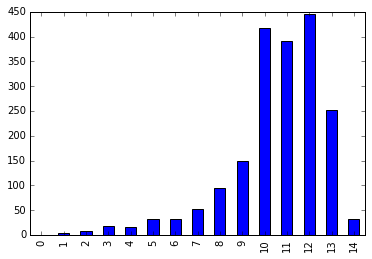

In [489]:
# here's the histogram without the outliers
df_temp.rating_numerator.value_counts().sort_index().plot(kind="bar")
# df_master.rating_numerator.value_counts().sort_index().plot(kind="bar")

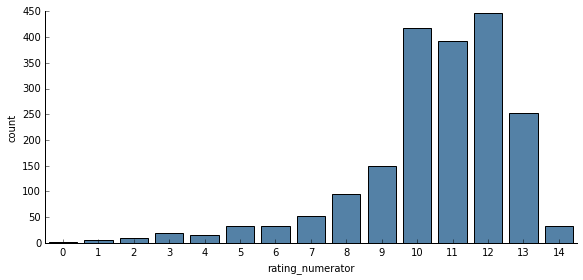

In [490]:
# same plot using Seaborn
sns.factorplot("rating_numerator", data=df_temp, aspect=2,
                       kind="count", color='steelblue')

To **summarize the main insight** here: the ratings themselves are not very carefully distributed nor are they very important to the success of WeRateDogs.  I would hypothesize that the combination of cute photos and funny tweets is really what makes the account popular.

### Insight #2 - Most Popular Dog Names

This is a comparatively minor insight that derives from my own curiousity as a former dog owner. What are people naming their pets these days?

Remembering that the Tweet archive did not capture all the names - there are 1364 items in the `name` variable, here are the 25 most frequently occuring dog names.

In [507]:
# df_master['name'].value_counts().nlargest(25)
df_master['name'].value_counts()[df_master['name'].value_counts()>4]

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Lola        7
Toby        7
Bo          6
Jax         6
Bella       6
Stanley     6
Koda        6
Rusty       5
Buddy       5
Scout       5
Leo         5
Oscar       5
Dave        5
Louis       5
Milo        5
Bailey      5
Chester     5
Name: name, dtype: int64

And here is a histogram of their distribution: not very informative in comparison with the previous section. I might leave this out of my final report.

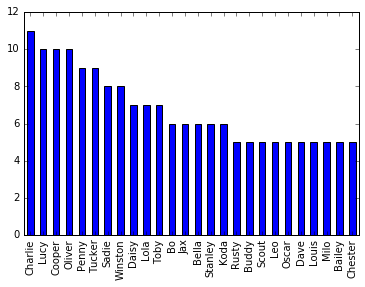

In [512]:
df_master['name'].value_counts()[df_master['name'].value_counts()>4].plot(kind="bar")

### Insight #3 Correlation of 'Retweets' and 'Favorites'

An interesting feature of Twitter is that there are a couple ways for users to show their approval or interest in someone else's posts: they can 'favorite' an item by toggling a little heart icon or they can 'retweet' it by broadcasting it to their own followers.

I had noticed while visually inspecting this dataset that the favorite numbers seemed higher than the retweets and also that a few items had '0' favorites (which seems an anomaly).

As a first step toward understanding how these actions work, I thought it would be interesting to plot `retweet_count` and `favorite_count` against each other in a scatterplot.

I used Seaborn to create two different versions. First is a 'jointplot,' so called because it includes a histogram of each variable with the scatterplot. In this case, I eliminated outliers by limiting the x- and y-axis which enables us to see the 95-percent reasonably well.

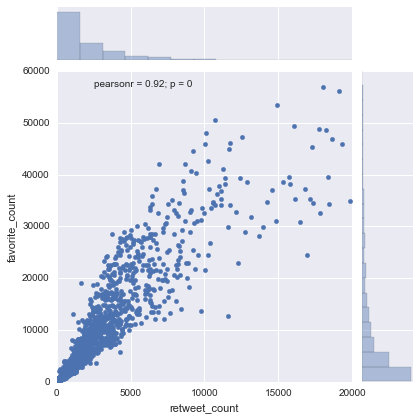

In [543]:
sns.jointplot(x='retweet_count', y='favorite_count', data=df_master, \
              xlim = (0,20000), ylim=(0, 60000))

The jointplot also gives a Pearson correlation coefficient, which in this case is close to 1, which indicates a pretty high correlation between the two numbers (retweets are between 1/2 and 1/3 the level of favorites.

For comparison, I also a created an 'lmplot' (for linear model) which includes the outliers. Though I omitted the linear fit line, you can see that it would be almost a perfect 45 deg diagonal from (0,0) of the xy axis.

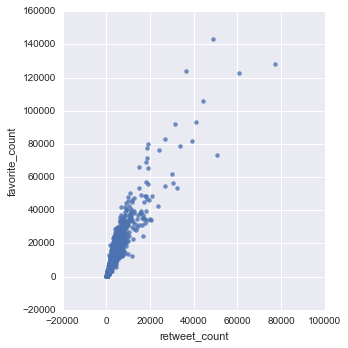

In [561]:
sns.lmplot("retweet_count", "favorite_count", data=df_master, fit_reg=False)

#### Insight 4  Image Predictions

The image predictions file which we downloaded from the Udacity server and which was merged into the master data set is the output from a machine learning exercise which took the tweet images as inputs.

What I was hoping to learn was which percentage of first, second and thrid guesses were correct in guessing each dog's breed, but when I looked carefully at the data, I realized that we don't have an indicator for the breed of each dog.  Instead, we have an item which indicates whether each guess is a dog or some other kind of thing (animate or not). So I decided to collect the percentage of dogs guessed for each item.

First guess was 74.2% dogs.

In [553]:
p1_percent = sum(df_master['p1_dog'])/len(df_master['p1_dog'])
p1_percent

0.74226281075596146

Second guess was 75.0% dogs - so almost no difference.

In [562]:
p2_percent = sum(df_master['p2_dog'])/len(df_master['p2_dog'])
p2_percent

0.75088787417554537

Third and final guess is 72.6% dogs, so a slight decline here, but still in the same general range.

In [563]:
p3_percent = sum(df_master['p3_dog'])/len(df_master['p3_dog'])
p3_percent

0.72602739726027399

I was hoping to learn something interesting with  this investigation, but my takeaway is that in order to investigate further I need to understand more about the machine learning excercise and it would probably be very helpful to know what percentage of dog breeds were guessed correctly and also if it was on attempt #1, #2 or #3. Without this data, there's not much here that's worth visualizing.